# Homework 1 - data validation & cleaning (deadline 16. 11. 2025, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best as possible!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  1. Check consistency (i.e., that the same things are represented in the same way) of at least **three features** where you expect problems (including the "Object Name" feature). You can propose how to clean the selected features. However, **do not apply cleaning** (in your interest) 🙂 _(1.5 points)_
  1. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only). _(2 points)_
  1. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_
  1. Find some outliers and describe your method. _(3 points, depends on creativity)_
  1. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_
  1. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later. _(3 points)_
  1. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps, your choices of methods, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for 2 points together with the final presentation of the solution. 

**If you do all this properly, you will obtain 20 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', low_memory=False)

In [4]:
df.shape

(484956, 54)

In [5]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

In [7]:
df.dtypes.value_counts()

object     47
bool        3
int64       3
float64     1
Name: count, dtype: int64

Dataset contains 484956 rows and 54 features, most of them have object type.

## Consistency check

**Firstly, let's check "Object Name" feature**

In [9]:
print('Total elements: ', df['Object Name'].dropna().size)
print('Unique elements: ', df['Object Name'].nunique())
print('Unique elements after lowering strings: ', df['Object Name'].str.strip().str.lower().nunique())

Total elements:  482690
Unique elements:  28631
Unique elements after lowering strings:  27486


This feature is inconsistent, because the number of unique values changes after converting the strings to lowercase and removing whitespace(from edges).

In [11]:
df['Object Name'].value_counts().head(30)

Object Name
Print                                       102986
Photograph                                   29451
Drawing                                      26018
Book                                         13397
Kylix fragment                                8926
Piece                                         8621
Fragment                                      7213
Painting                                      6014
Negative                                      5928
Bowl                                          3633
Vase                                          3219
Figure                                        3035
Dress                                         2639
Baseball card                                 2505
Baseball card, print                          2463
Textile fragment                              2301
Plate                                         2230
Ensemble                                      2121
Books Prints Ornament & Architecture          2120
Baseball card, phot

In the displayed 30 most common values we see duplicates 'Baseball card', 'Baseball card, print' and 'Baseball card, photograph'. Let's see if there are other duplicates.

In [13]:
mask = df['Object Name'].str.contains('baseball', regex=True, case=False, na=False)
print("Count: ", df['Object Name'][mask].size)
df.loc[mask, 'Object Name'].unique()

Count:  8155


array(['Baseball card, print', 'Baseball card',
       'Baseball card, photograph', 'Photograph, baseball card',
       'Print, baseball card', 'Photograph baseball card',
       'Print baseball card', 'Baseball, print', 'Print, baseball'],
      dtype=object)

As we see there are 8 unique values, we can unite in one value(for example as baseball card).
Let's explore next value Print. 

In [15]:
mask = df['Object Name'].str.contains('print', regex=True, case=False, na=False)
print("Count: ", df.loc[mask, 'Object Name'].size)
df.loc[mask, 'Object Name'].unique()

Count:  123252


array(['Print', 'Print table', 'Printed piece', 'Printed velvet',
       'Framed print', 'Print from a woodcut',
       'Woodblock print (nishiki-e)', 'Woodblock prints',
       'Woodblock print', 'woodblock print (nishiki-e)', 'Prints',
       'Woodblock print (niskiki-e)', 'Woodblock prints (nishiki-e)',
       'Lacquer print', "Printer's woodblock", 'Reproduction of a print',
       'Printed scroll', 'Printed book', 'Woodblock printing block',
       'Woodblock prints\r\n', 'Floral print',
       'Wallpaper; ornament and architecture; print',
       'Photomechanical print', 'Negative print',
       'Rayograph; Photogram; Contact Print',
       'Photograph; Photomechanical print', '3-D Printed Figure',
       'Print; Photograph', 'Photograph; Copy print', 'Album print',
       'Album ; prints', 'Album ; print', 'Print, poster',
       'Portfolio Prints Ornament and Architecture',
       'Print Ornament & Architecture', 'Prints Ornament & Architecture',
       'Print ornament & archit

As we see again some values are repeated in different forms.
For example:
- Woodblock print.
- Ornament & Architecture.
- Albums.

We can continue similarly and find other inconsistency in 'Object Name'. For clearing this feature:
- Convert string to lowercase end strip whitespaces.
- Find duplicates values and convert it to one value.

**Now let's look at 'AccessionYear' and see if it has the same format.**

In [19]:
df['AccessionYear'].dropna().unique()

array(['1979', '1980', '1967', '1916', '1909', '1964', '1970', '1904',
       '1976', '1938', '1918', '1946', '1960', '1910', '1922', '1923',
       '1930', '1934', '1936', '1937', '1939', '1941', '1947', '1948',
       '1949', '1971', '1984', '1989', '1985', '1952', '1968', '1919',
       '1978', '1972', '1924', '1983', '1950', '1925', '1926', '1931',
       '1932', '1951', '1953', '2006', '1969', '1975', '1981', '1986',
       '1959', '1944', '1982', '1945', '1888', '1911', '1957', '1943',
       '1935', '1917', '1973', '1940', '1913', '1962', '1914', '1966',
       '1954', '1920', '1933', '2014', '1928', '1901', '1958', '1965',
       '1883', '1902', '1987', '1974', '1977', '1915', '1942', '1912',
       '1927', '1896', '1892', '1877', '1906', '1955', '1961', '1994',
       '1907', '1929', '2018', '1921', '1908', '1963', '2010', '2000',
       '1988', '2021', '1956', '2012', '2013', '2002', '1999', '1894',
       '1897', '1993', '1893', '1992', '1996', '1898', '1899', '1991',
      

As we can see this feature mostly contains numbers(years) and dates. We can solve this inconsistency in two ways:
- Converting years to dates(day and month will be set to 1.1.year
- Leave only years from dates.

**Next let's check inconsistency in 'Title' feature.**

In [22]:
print('Total elements: ', df['Title'].dropna().size)
print('Unique elements: ', df['Title'].nunique())
print('Unique elements after lowering strings: ', df['Title'].str.strip().str.lower().nunique())

Total elements:  456153
Unique elements:  245800
Unique elements after lowering strings:  243606


In [23]:
df['Title'].value_counts().head(30)

Title
Terracotta fragment of a kylix (drinking cup)        6415
Piece                                                4670
Fragment                                             3362
Dress                                                2513
Ensemble                                             2026
Terracotta rim fragment of a kylix (drinking cup)    1839
Textile Fragment                                     1826
Bowl                                                 1799
Evening dress                                        1789
Stucco Fragment                                      1702
Hat                                                  1384
Untitled                                             1369
Scarab                                               1348
Plate                                                1327
Vase                                                 1310
Sword Guard (Tsuba)                                  1136
Jar Label                                            1105
Knife Ha

As we see that it has 3 repeated values: terracota fragment of...

In [25]:
mask = df['Title'].str.contains('Terracotta.*fragment.*of.*kyli.*', case=False, regex=True, na=False)
print("Count: ", df.loc[mask, 'Title'].nunique())
df.loc[mask, 'Title'].unique()

Count:  98


array(['Terracotta rim fragments of a kylix (drinking cup)',
       'Terracotta rim fragment of a kylix:band-cup',
       'Terracotta fragment of a kylix (drinking cup)',
       'Terracotta fragments of a kylix (drinking cup)',
       'Terracotta rim fragment of a kylix (drinking cup)',
       'Terracotta fragments of kylikes (drinking cups)',
       'Terracotta rim fragments of kylikes (drinking cups)',
       'Terracotta fragments of kylikes(drinking cups)',
       'Terracotta fragments of a kylikes (drinking cups)',
       'Terracotta fragments of kylikes  (drinking cups)',
       'Terracotta fragment of a kylix (drinking cup) or plate',
       'Terracotta rim  fragment of a kylix (drinking cup)',
       'Terracotta fragments of a kylix or skyphos?',
       'Terracotta fragment of a kylix or skyphos',
       'Terracotta rim fragment of a kylix or skyphos? (drinking cup)',
       'Terracotta fragment of a kylix? (drinking cup)',
       'Terracotta rim fragments of kylikes (drinking c

As we can see this feature has same inconsistency as 'Object Name' feature. We can apply the same clearing approach that was proposed for 'Object Name'.

## Integrity check

**'Object Begin Date' and 'Object End Date' check**

Both of them are int64 type so we can compare them and 'Object Begin Date' must be lesser or equal to 'Object End Date'.

In [30]:
mask = df['Object Begin Date'] > df['Object End Date']
df.loc[mask, ['Object Begin Date', 'Object End Date']]

,Object Begin Date,Object End Date
27043,5,0
32741,-45,-55
38712,1300,14
47453,1861,9
79176,1875,1800
...,...,...
479520,1911,0
481018,2012,0
481042,2012,0
481043,2012,0


And as we see there are integrity problem, some 'Object Begin Date' are greater than 'Object End Date'.
That might have happen because of emplayer mistake that was filling the dataset.

**'City' and 'Country' check**

We need to check that each city belongs to corresponding country.

We check that every non-null city has a corresponding country.
The opposite case is not considered, as a country may be known even if the city is missing.

In [35]:
mask = df['City'].notna() & df['Country'].isna()
df.loc[mask, ['City', 'Country']]

,City,Country
13364,Philadelphia,NaN
14915,New York,NaN
15436,Pittsburgh,NaN
15814,New York,NaN
15989,Philadelphia,NaN
...,...,...
484476,New Haven,NaN
484482,New Haven,NaN
484749,New York,NaN
484790,London,NaN


And we see that 14359 rows with non-null city misses the coutnry.

The next step is to check that city belongs to corresponding country. To do that we can use trustworhy dataset, for example: https://www.kaggle.com/datasets/juanmah/world-cities. Probably 'City' and 'Country' feature are inconsistent, let's check it.

In [38]:
print("City unique count before converting to lowercase and stripping: ", df['City'].dropna().nunique())
print("City unique count after converting to lowercase and stripping: ", df['City'].dropna().str.strip().str.lower().nunique())
print("Country unique count before converting to lowercase and stripping: ", df['Country'].dropna().nunique())
print("Country unique count after converting to lowercase and stripping: ", df['Country'].dropna().str.strip().str.lower().nunique())

City unique count before converting to lowercase and stripping:  2622
City unique count after converting to lowercase and stripping:  2611
Country unique count before converting to lowercase and stripping:  967
Country unique count after converting to lowercase and stripping:  950


After converting the strings to lowercase and stripping whitespace, the number of unique values decreased slightly.
However, there is problem in Country feature: it contains around 950 unique entries, while only about 200 countries exist in reality. Let's review it

In [40]:
mask = df['Country'].str.contains('united', case=False, na=False)
df.loc[mask, 'Country'].unique()

array(['United States', 'United States|England',
       'United States|United States', 'United States|France',
       'Ireland|United States', 'England|United States',
       'United States|United States|United States',
       'United States|Germany', 'United Kingdom', 'United States|Denmark',
       'Finland|Denmark|United States', 'United States|China',
       'United States|Wales', 'Italy|United States',
       'United States|England|Scotland|Wales',
       'United States|United States|United States|United States',
       'United States|France|Tibet', 'United States|British Isles',
       'United States|India', 'United States|Italy', 'United States(?)',
       'United States or Canada', 'United States (?)',
       'Canada or United States', 'Italy and United States',
       'United Kingdom?', 'United States or Mexico: N.A.',
       'United States?', 'United States or Brazil',
       'United Kingdom or Germany', 'United States or Germany ?',
       'United States or Canada: N.A.', 'U

And we see here that we have some duplicates, some values contains several countries. We can't procceed with checking integrity of 'City' and 'Country', withous cleaning both features. 

Cleaning both features will take some time, so we won't do that here. But after cleaning, we can check the integrity using the dataset, that was mentinoed earlier.

## Features converting

In this part we will convert 5 features to proper data type.

Let's review 'Gallery Number' 

In [45]:
df['Gallery Number'].dropna().unique()

array(['774', '706', '724', '741', '728', '719', '718', '729', '712',
       '516', '737', '738', '701', '734', '708', '722', '713', '730',
       '752', '736', '714', '740', '743', '725', '739', '745', '700',
       '704', '750', '512', '751', '717', '749', '733', '773', '710',
       '744', '726', '705', '732', '731', '723', '715', '508', '510',
       '747', '756', '720', '721', '766', '761', '762', '754', '372',
       '554', '707', '764', '768', '771', '760', '758', '759', '763',
       '681', '824', '769', '748', '753', '772', '755', 'in Great Hall',
       '767', '770', '765', '703', '809', '735', '727', '599', '742',
       '757', '380', '378', '371', '379', '375', '374', '376', '373',
       '455', '377', '370', '459', '509', '457', '307', '303', '304',
       '306', '014', '503', '010', '544', '301', '002', '305', '216',
       '236', '222', '207', '208', '223', '210', '213', '230', '214',
       '251', '244', '235', '237', '247', '249', '248', '250', '204',
       '238', '25

As we see this feature mostly contains number, but there 3 string values: 'on Fifth Avenue', 'Watson Library', 'in Great Hall'. It might be error maden by employer, when he was filling dataset, or they did not give number to those strings.
We will convert feature to numeric type. 

In [47]:
df['Gallery Number'] = pd.to_numeric(df['Gallery Number'], errors='coerce')

Next feature that we will explore is 'Department'

In [49]:
print('Department unique counts: ', df['Department'].nunique())
df['Department'].unique()

Department unique counts:  19


array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

As we see department has only 19 unique values and they are consistent. We will convert it to category(nominal)

In [51]:
df['Department'] = df['Department'].astype('category')

AccessionYear feature will be converted to datetime.

In [53]:
df['AccessionYear'].unique()

array(['1979', '1980', '1967', '1916', '1909', '1964', '1970', '1904',
       '1976', '1938', '1918', '1946', '1960', '1910', '1922', '1923',
       '1930', '1934', '1936', '1937', '1939', '1941', '1947', '1948',
       '1949', '1971', '1984', '1989', '1985', '1952', '1968', '1919',
       nan, '1978', '1972', '1924', '1983', '1950', '1925', '1926',
       '1931', '1932', '1951', '1953', '2006', '1969', '1975', '1981',
       '1986', '1959', '1944', '1982', '1945', '1888', '1911', '1957',
       '1943', '1935', '1917', '1973', '1940', '1913', '1962', '1914',
       '1966', '1954', '1920', '1933', '2014', '1928', '1901', '1958',
       '1965', '1883', '1902', '1987', '1974', '1977', '1915', '1942',
       '1912', '1927', '1896', '1892', '1877', '1906', '1955', '1961',
       '1994', '1907', '1929', '2018', '1921', '1908', '1963', '2010',
       '2000', '1988', '2021', '1956', '2012', '2013', '2002', '1999',
       '1894', '1897', '1993', '1893', '1992', '1996', '1898', '1899',
       '1

In [54]:
df['AccessionYear'] = pd.to_datetime(df['AccessionYear'], errors='coerce', format='%Y', exact=False)

In [55]:
df['AccessionYear'].unique()

<DatetimeArray>
['1979-01-01 00:00:00', '1980-01-01 00:00:00', '1967-01-01 00:00:00',
 '1916-01-01 00:00:00', '1909-01-01 00:00:00', '1964-01-01 00:00:00',
 '1970-01-01 00:00:00', '1904-01-01 00:00:00', '1976-01-01 00:00:00',
 '1938-01-01 00:00:00',
 ...
 '2005-01-01 00:00:00', '2016-01-01 00:00:00', '2004-01-01 00:00:00',
 '2017-01-01 00:00:00', '2009-01-01 00:00:00', '1879-01-01 00:00:00',
 '1870-01-01 00:00:00', '1878-01-01 00:00:00', '1871-01-01 00:00:00',
 '2023-01-01 00:00:00']
Length: 155, dtype: datetime64[ns]

The next feature is **'Constituent ID'**

In [57]:
print("Type: ", df['Constituent ID'].dtype)
print("Total non-null count: ", df['Constituent ID'].dropna().size)
print("Unique count: ", df['Constituent ID'].nunique())
df['Constituent ID'].unique()[:50]

Type:  object
Total non-null count:  282513
Unique count:  48365


array(['16429', '107', nan, '108', '16459', '108316253', '16428', '16258',
       '16605', '109', '937', '16230', '16254216254', '16272', '16254',
       '8737', '16237', '938', '110', '345', '16520', '16475', '111',
       '133', '16381', '16276', '112', '16497', '110321528', '215281110',
       '16288', '162541353', '113', '16249', '16515616249', '16249317803',
       '162493113417803', '114', '1147114', '115', '1154115', '1159739',
       '116', '1130116', '738', '117', '1173117', '118', '119', '755'],
      dtype=object)

Let's see if feature contains other values than numbers.

In [59]:
mask = df['Constituent ID'].str.contains(r'[^0-9]', na=False)
df.loc[mask, 'Constituent ID']

Series([], Name: Constituent ID, dtype: object)

In [60]:
df['Constituent ID'] = pd.to_numeric(df['Constituent ID'], errors='coerce')

At last let's convert 'Classficication' feature.

In [62]:
print("Total non-null count: ", df['Classification'].dropna().size)
print("Unique count: ", df['Classification'].nunique())
df['Classification'].dropna().value_counts().head(10)

Total non-null count:  406239
Unique count:  1244


Classification
Prints                  84326
Prints|Ephemera         29148
Photographs             27336
Drawings                23062
Vases                   21302
Books                   14779
Ceramics                11066
Textiles-Woven          10970
Photographs|Ephemera    10389
Paintings                9005
Name: count, dtype: int64

In [63]:
df['Classification'] = df['Classification'].astype('category')

In [64]:
df['Constituent ID'] = pd.to_numeric(df['Constituent ID'], errors='coerce')
df['Object Date'] = pd.to_numeric(df['Object Date'], errors='coerce')

In [65]:
df[['Department', 'Gallery Number', 'AccessionYear', 'Classification', 'Constituent ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Department      484956 non-null  category      
 1   Gallery Number  49504 non-null   float64       
 2   AccessionYear   481094 non-null  datetime64[ns]
 3   Classification  406239 non-null  category      
 4   Constituent ID  282497 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 12.5 MB


## Outliers

Let's find outliers in AccessionYear, what are we looking for is count of object given to museum. For vizualitions we will use boxplot. 

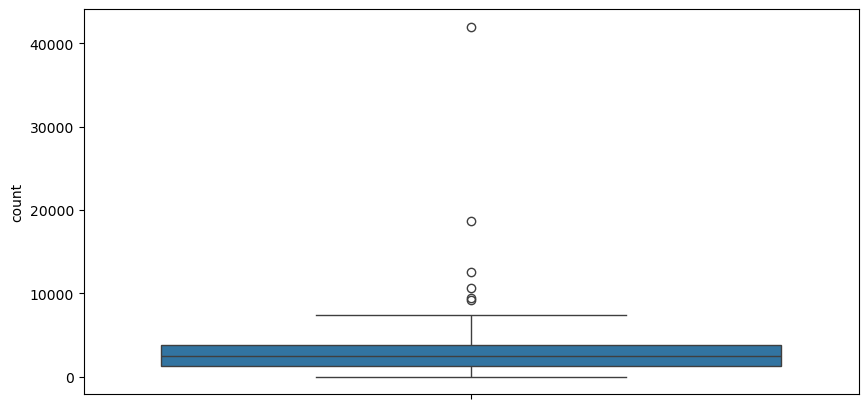

In [68]:
years_counts = data=df['AccessionYear'].dt.year.value_counts()
plt.figure(figsize=(10, 5))
sns.boxplot(years_counts)
plt.show()

The circles above the upper whisker represents out outliers. Now let's find corresponding years of those outliers.

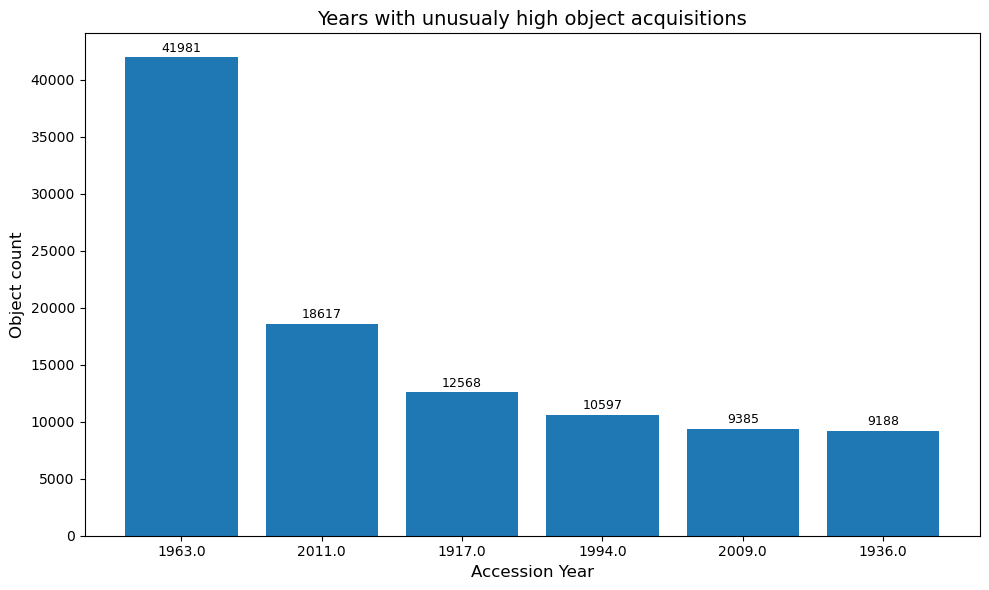

In [70]:
Q1 = years_counts.quantile(0.25)
Q3 = years_counts.quantile(0.75)
IQR =  Q3 - Q1
# display(IQR)
outliers = (years_counts > Q3 + 1.5*IQR) | (years_counts < Q1 - 1.5*IQR)

outlier_years = years_counts[outliers].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(outlier_years.index.astype(str), outlier_years.values)

for i, v in enumerate(outlier_years.values):
    plt.text(i, v + 500, str(v), ha='center', fontsize=9)
    
plt.title('Years with unusualy high object acquisitions', fontsize=14)
plt.xlabel('Accession Year', fontsize=12)
plt.ylabel('Object count', fontsize=12)
plt.tight_layout()
plt.show()

There are a total of six outlier years. The highest number of objects acquired by the museum occurred in 1963.

## Cleaning 'Medium' feature

Firstly, we will review total count, unique count value of feature, and top 20 commnon values.

In [74]:
print("Total non-null count: ", df['Medium'].dropna().size)
print("Unique count: ", df['Medium'].nunique())
df['Medium'].value_counts().head(20)

Total non-null count:  477741
Unique count:  65907


Medium
Terracotta                                  23514
Commercial color lithograph                 18206
Etching                                     17325
Engraving                                   11736
Gelatin silver print                        10411
Albumen photograph                          10152
Silk                                         8501
Bronze                                       7225
Lithograph                                   6987
Glass                                        6509
Film negative                                5894
Faience                                      4931
Albumen silver print from glass negative     4809
Woodcut                                      4753
Silver                                       4719
silk                                         4674
Gold                                         3851
Etching and engraving                        3598
Oil on canvas                                3507
Commercial color photolithograph           

Converting strings to lowercase and stripping whitespace from edges.

In [76]:
df['Medium'] = df['Medium'].str.strip().str.lower()
print("Unique count: ", df['Medium'].nunique())
df['Medium'].value_counts().head(20)

Unique count:  63784


Medium
terracotta                                  23547
commercial color lithograph                 19001
etching                                     17524
silk                                        13322
engraving                                   11777
gelatin silver print                        10458
albumen photograph                          10152
bronze                                       7275
lithograph                                   7041
glass                                        6679
film negative                                5894
cotton                                       5472
faience                                      4999
albumen silver print from glass negative     4809
silver                                       4804
woodcut                                      4771
gold                                         3944
etching and engraving                        3655
oil on canvas                                3517
commercial color photolithograph           

After converting to lowercase and stripping, number of unique value slightly dropped.
Let's review lenghts of the value.

In [78]:
df['Medium'].str.len().describe()

count    477741.000000
mean         22.160660
std          23.467306
min           0.000000
25%           9.000000
50%          17.000000
75%          28.000000
max        7859.000000
Name: Medium, dtype: float64

The 20 most common values show that the Medium feature contains not only the materials from which the objects were made, but also the techniques used to create them, such as lithograph, engraving, and etching.
These techniques can be grouped under a single category called 'print'.
We will also include other related terms such as silver print, albumen, and similar entries in this category.

In [80]:
mask = df['Medium'].str.contains('print|lithograph|engraving|etching|etching and engraving|etching & engraving|etching or engraving|silver print|albumen|gelatin print|silver photograph', na=False)
df.loc[mask, 'Medium'] = 'print'

In [81]:
print("Unique count: ", df['Medium'].nunique())
df['Medium'].value_counts().head(20)

Unique count:  53337


Medium
print                   164169
terracotta               23547
silk                     13322
bronze                    7275
glass                     6679
film negative             5894
cotton                    5472
faience                   4999
silver                    4804
woodcut                   4771
gold                      3944
oil on canvas             3517
wood                      2850
wool                      2571
hard-paste porcelain      2568
stone                     2165
porcelain                 2091
linen                     2044
ceramic                   1913
limestone                 1841
Name: count, dtype: int64

Unique count have dropped by more than 10000. Now we mostly see materials, let's review the most common one - terracotta.

In [83]:
mask = df['Medium'].str.contains('terracotta', na=False)
df.loc[mask, 'Medium'].unique()

array(['terracotta', 'terracotta with inlaid designs',
       'terracotta with buff slip and red oxide decoration',
       'terracotta with inlaid clay designs', 'painted terracotta',
       'terracotta with traces of gesso and pigment',
       'clay or terracotta', 'terracotta with traces of paint',
       'double-molded terracotta', 'terracotta, black oxidation patina',
       'terracotta with traces of red lacquer(?)', 'molded terracotta',
       'terracotta?', 'red terracotta', 'stone and terracotta',
       'terracotta with ink',
       'terracotta with designs in black and gold lacquer (owari ware)',
       'unglazed terracotta', 'sunbaked terracotta', 'glazed terracotta',
       'plaster, painted to imitate terracotta; pedestal, painted black',
       'terracotta, polychromed and gilt',
       'terracotta, partially glazed and gilded',
       'terracotta, painted to resemble bronze',
       'terracotta, gilded; marble top', 'terracotta, polychrome',
       'terracotta, polychrom

We can see that some objects are made not from a single material but from multiple ones.
To handle this, we will create a set containing all distinct materials extracted from the feature — each value in the set will represent one unique material.
We will build this set iteratively by identifying the most common material in the feature that is not included, and then adding it to the set.

In [85]:
materials = {
    'terracotta', 'silk', 'bronze', 'glass', 'cotton', 'faience', 'silver', 'gold', 'wood', 'wool', 'porcelain', 'stone', 
    'linen', 'ceramic', 'limestone'
}

Let's look which materials we can add to set.

In [87]:
mask = ~df['Medium'].str.lower().str.contains('|'.join(materials), na=False)
df.loc[mask, 'Medium'].value_counts().head(40)

Medium
print                                                        164169
film negative                                                  5894
oil on canvas                                                  3517
bobbin lace                                                    1833
steel                                                          1757
iron                                                           1739
ivory                                                          1701
[no medium available]                                          1662
leather                                                        1465
graphite                                                       1423
earthenware                                                    1418
pottery                                                        1375
pottery and ink, paint                                         1316
marble                                                         1153
brass                                    

In [88]:
materials.update([
    'steel', 'iron', 'ivory', 'leather', 'graphite', 'pottery', 'earthenware', 'marble', 'brass', 'copper',
    'metal', 'clay', 'stucco', 'graphite', 'carnelian', 'steatite', 'flint', 'mud', 'jade', 'pewter'
])

In [89]:
mask = ~df['Medium'].str.contains('|'.join(materials), na=False)
df.loc[mask, 'Medium'].value_counts().head(40)

Medium
print                                                        164169
film negative                                                  5894
oil on canvas                                                  3517
bobbin lace                                                    1833
[no medium available]                                          1662
drypoint                                                        921
ink on paper                                                    895
cut paper silhouette                                            817
travertine (egyptian alabaster)                                 803
illustrations: photomechanical process                          730
pen and black ink, watercolor and gouache with gum arabic       727
watercolor                                                      632
paper                                                           619
needle lace                                                     581
bone                                     

In [90]:
materials.update([
    'lace', 'bone', 'lead', 'gilt', 'enamel', 'nephrite', 'oak', 'hematite', 'plaster', 'bamboo'
])

In [91]:
mask = ~df['Medium'].str.contains('|'.join(materials), na=False)
df.loc[mask, 'Medium'].nunique()

12631

After adding several materials to set, number of unique values dropped to 12631.

In [93]:
df.loc[mask, 'Medium'].value_counts().head(40)

Medium
print                                                        164169
film negative                                                  5894
oil on canvas                                                  3517
[no medium available]                                          1662
drypoint                                                        921
ink on paper                                                    895
cut paper silhouette                                            817
travertine (egyptian alabaster)                                 803
illustrations: photomechanical process                          730
pen and black ink, watercolor and gouache with gum arabic       727
watercolor                                                      632
paper                                                           619
photogravure                                                    499
mezzotint                                                       485
pen and brown ink                        

We see that new values have appeared. Ink, oil on something, canvas, watercolor, chalk on paper. We will group it in uder one category - painting.

In [95]:
print(df['Medium'].nunique())
mask = df['Medium'].str.contains('oil on|paper|ink|pen|chalk|watercolor|gouache|paint|canvas', na=False)
df.loc[mask, 'Medium'] = 'painting'

53337


drypoint mezzotint it is technique that can be assign as print, this as well go for cut techniques.

In [97]:
mask = df['Medium'].str.contains('cut|drypoint|mezzotint', na=False)
df.loc[mask, 'Medium'] = 'print'

Let's unite all illustrations under one category

In [99]:
mask = df['Medium'].str.contains('illustrations', na=False)
df.loc[mask, 'Medium'] = 'illustrations'

We see [no medium available] value, let convert all no medium value to 'unknown'

In [101]:
mask = df['Medium'].str.contains('no medium', na=False)
df.loc[mask, 'Medium'] = 'unknown'

Word negative has relation with photography, that is why we will assign it as photography

In [103]:
mask = df['Medium'].str.contains('negative', na=False)
df.loc[mask, 'Medium'] = 'photography'

In [104]:
mask = ~df['Medium'].str.contains('|'.join(materials), na=False)
df.loc[mask, 'Medium'].nunique()

3932

After adding value to materials and assigning some values under one category, number of unique values dropped significantly. We could continue refining it to reduce the number even further, but we will apply the same approach as described below.
Now, we will assign each material to under one name.

In [106]:
# Returns a regular expression string containing all material names
# except for the one specified in the 'current' parameter.
def get_mix_mask_pattern(current):
    return '|'.join([m for m in materials if m != current])

def normalize_medium_with_mix(df, name):
    mask = df['Medium'].str.contains(name, na=False)
    mask_mix = df['Medium'].str.contains(get_mix_mask_pattern(name), na=False)
    #Material appears alone (not mixed with others)
    df.loc[mask & ~mask_mix, 'Medium'] = name
    #Material appears together with other materials
    df.loc[mask & mask_mix, 'Medium'] = 'other'

In [107]:
for m in materials:
    normalize_medium_with_mix(df, m)

In [108]:
print(df['Medium'].nunique())
df['Medium'].value_counts().head(30)

3975


Medium
print          174891
painting        62515
other           53386
terracotta      23707
silk            17613
glass           10483
bronze           8264
porcelain        7823
cotton           6857
wood             6680
faience          6117
photography      6112
silver           5759
earthenware      5727
gold             5563
stone            4811
wool             3681
lace             3256
ceramic          2846
copper           2744
steatite         2466
metal            2431
linen            2353
iron             2345
clay             2329
ivory            2243
steel            2085
leather          2052
graphite         1794
pottery          1765
Name: count, dtype: int64

Let's add another values that we created but not added to the materials.

In [110]:
materials.update(['print', 'painting', 'illustrations', 'other', 'unknown', 'photography'])

Each value that is not in materials, will be assigned as 'other'

In [112]:
mask_not_in_materials = ~df['Medium'].isin(materials) & df['Medium'].notna()
df.loc[mask_not_in_materials, 'Medium'] = 'other'

In [113]:
print(df['Medium'].nunique())
df['Medium'].value_counts()

49


Medium
print            174891
other             74744
painting          62515
terracotta        23707
silk              17613
glass             10483
bronze             8264
porcelain          7823
cotton             6857
wood               6680
faience            6117
photography        6112
silver             5759
earthenware        5727
gold               5563
stone              4811
wool               3681
lace               3256
ceramic            2846
copper             2744
steatite           2466
metal              2431
linen              2353
iron               2345
clay               2329
ivory              2243
steel              2085
leather            2052
graphite           1794
pottery            1765
brass              1695
unknown            1671
illustrations      1595
marble             1537
jade               1056
bone                981
stucco              959
carnelian           864
mud                 722
flint               690
oak                 648
pewter   

We can still group some values under broader categories.
For example, bronze, silver, and gold can be combined into a single category called metal.
Let's create a dictionary that maps each material to its corresponding category.

In [115]:
group_material = {
    'metal': [
        'bronze', 'silver', 'gold', 'copper', 'iron', 'steel',
        'brass', 'lead', 'pewter', 'gilt', 'enamel', 'metal'
    ],

    'glass': ['glass'],

    'textile': [
        'silk', 'cotton', 'wool', 'linen', 'lace',
        'leather', 'bamboo'
    ],

    'ceramic': [
        'terracotta', 'faience', 'porcelain', 'ceramic',
        'earthenware', 'clay', 'pottery'
    ],

    'wood': [
        'wood', 'oak', 'bamboo'
    ],

    'organic': [
        'ivory', 'bone'
    ],

    'stone': [
        'stone', 'marble', 'jade', 'steatite', 'carnelian',
        'flint', 'nephrite', 'hematite', 'limestone', 'graphite'
    ],

    'print': ['print'],
    
    'painting': ['painting'],
    
    'photography': ['photography'],
    
    'illustrations': ['illustrations'],

    'other': [
        'other', 'mud', 'plaster', 'stucco'
    ],
    'unknown': ['unknown']
}

Now we assigned each value to corresponding group.

In [117]:
temp = {}
for g, material  in group_material.items():
    for m in material:
        temp[m] = g

df['Medium'] = df['Medium'].replace(temp)

In [118]:
print(df['Medium'].nunique())
df['Medium'].value_counts()

13


Medium
print            174891
other             76813
painting          62515
ceramic           50314
textile           35812
metal             32429
stone             14075
glass             10483
wood               7807
photography        6112
organic            3224
unknown            1671
illustrations      1595
Name: count, dtype: int64

Let's see if Medium contains missing values.

In [120]:
df['Medium'].isna().sum()

7215

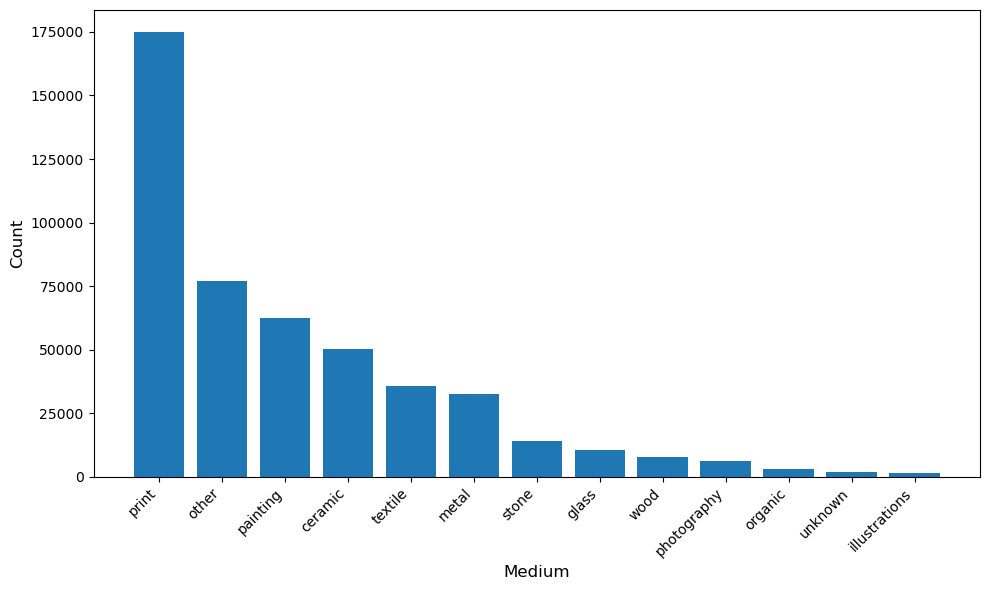

In [122]:
medium_counts = df['Medium'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(medium_counts.index, medium_counts.values)
plt.xlabel('Medium', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

At the end, we have 13 unique values. 

## Missing values

Let's visualize number of missing values for each feature  

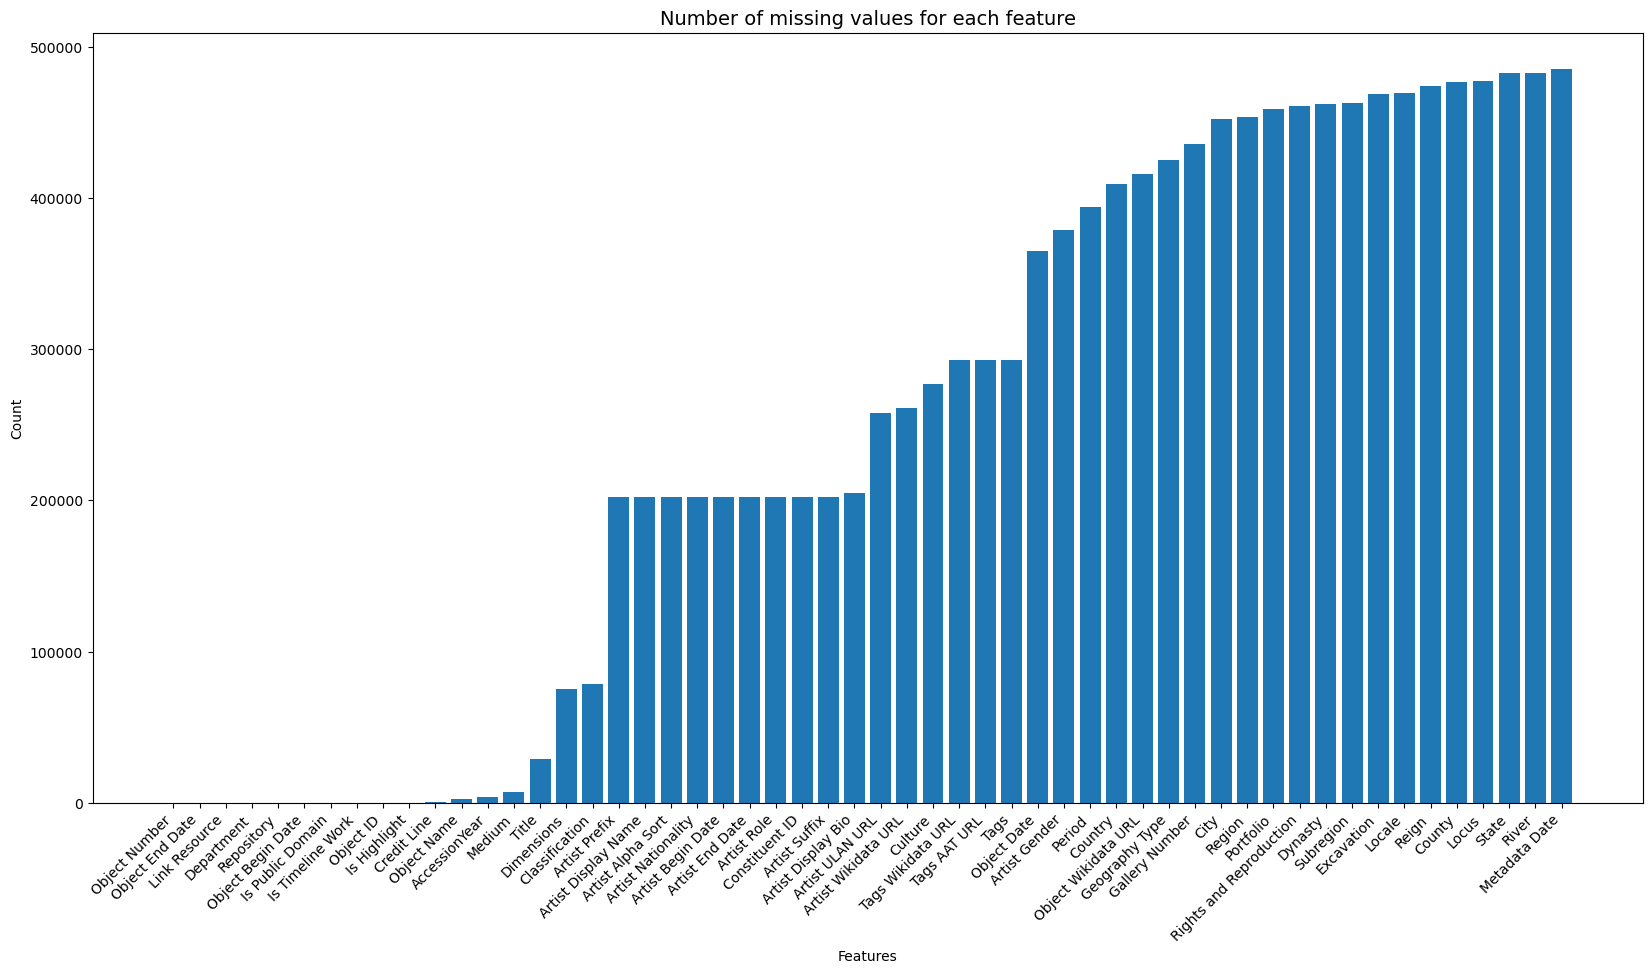

In [125]:
missing = df.isna().sum().sort_values()

plt.figure(figsize=(20, 10))
plt.bar(missing.index, missing.values)

plt.title('Number of missing values for each feature', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.show()

So we have many feature where values are missing. For example: Classification, Title, Object Name, Medium, AccessionYear and atd.


In [128]:
print('Medium null values count: ',  df['Medium'].isnull().sum())

Medium null values count:  7215


In [129]:
features = ['Classification', 'Department', 'Object Name', 'Medium']
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Classification  406239 non-null  category
 1   Department      484956 non-null  category
 2   Object Name     482690 non-null  object  
 3   Medium          477741 non-null  object  
dtypes: category(2), object(2)
memory usage: 8.8+ MB


Let's convert Object Name and Medium to category. 

In [131]:
df['Object Name'] = df['Object Name'].astype('category')
df['Medium'] = df['Medium'].astype('category')

In [132]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Classification  406239 non-null  category
 1   Department      484956 non-null  category
 2   Object Name     482690 non-null  category
 3   Medium          477741 non-null  category
dtypes: category(4)
memory usage: 4.0 MB


KNN operates only on numerical data, while all four selected features are categorical. 
To make them suitable for the algorithm, we convert each feature into numeric form. 
For this purpose, we use LabelEncoder, which replaces every unique category with a corresponding number.

In [133]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [134]:
knn_data = df[features].copy()

encoders = {}
for f in features:
    labelEncoder = LabelEncoder()
    labelEncoder.fit(knn_data[f].dropna())
    encoders[f] = labelEncoder
    knn_data[f] = knn_data[f].apply(lambda x: labelEncoder.transform([x])[0] if pd.notna(x) else np.nan)

In [135]:
knn_data = knn_data.astype(float)

In [136]:
knn_data['Medium'].isnull().sum()

7215

In [137]:
knn_data.dtypes

Classification    float64
Department        float64
Object Name       float64
Medium            float64
dtype: object

In [138]:
knn_data

,Classification,Department,Object Name,Medium
0,NaN,16.0,5529.0,3.0
1,NaN,16.0,5529.0,3.0
2,NaN,16.0,5529.0,3.0
3,NaN,16.0,5529.0,3.0
4,NaN,16.0,5529.0,3.0
...,...,...,...,...
484951,894.0,5.0,18611.0,8.0
484952,894.0,5.0,18611.0,8.0
484953,894.0,5.0,18611.0,8.0
484954,NaN,18.0,NaN,NaN


In [139]:
imputer = KNNImputer(n_neighbors=5)
imp_data = imputer.fit_transform(knn_data)

In [140]:
imp_df = pd.DataFrame(imp_data, columns=features)

After the imputation is complete, the numerical representations must be converted back into their original categorical form.

In [141]:
for f in features:
    labelEncoder = encoders[f]
    imp_df[f] = labelEncoder.inverse_transform(np.round(imp_df[f]).astype(int))

In [142]:
imp_df

,Classification,Department,Object Name,Medium
0,Metalwork-Bell Metal,The American Wing,Coin,metal
1,Metalwork-Bell Metal,The American Wing,Coin,metal
2,Metalwork-Bell Metal,The American Wing,Coin,metal
3,Metalwork-Bell Metal,The American Wing,Coin,metal
4,Metalwork-Bell Metal,The American Wing,Coin,metal
...,...,...,...,...
484951,Prints,Drawings and Prints,Print,print
484952,Prints,Drawings and Prints,Print,print
484953,Prints,Drawings and Prints,Print,print
484954,Metalwork-Gold|Sculpture-Sheet metal,The Libraries,Ice cream plate,painting


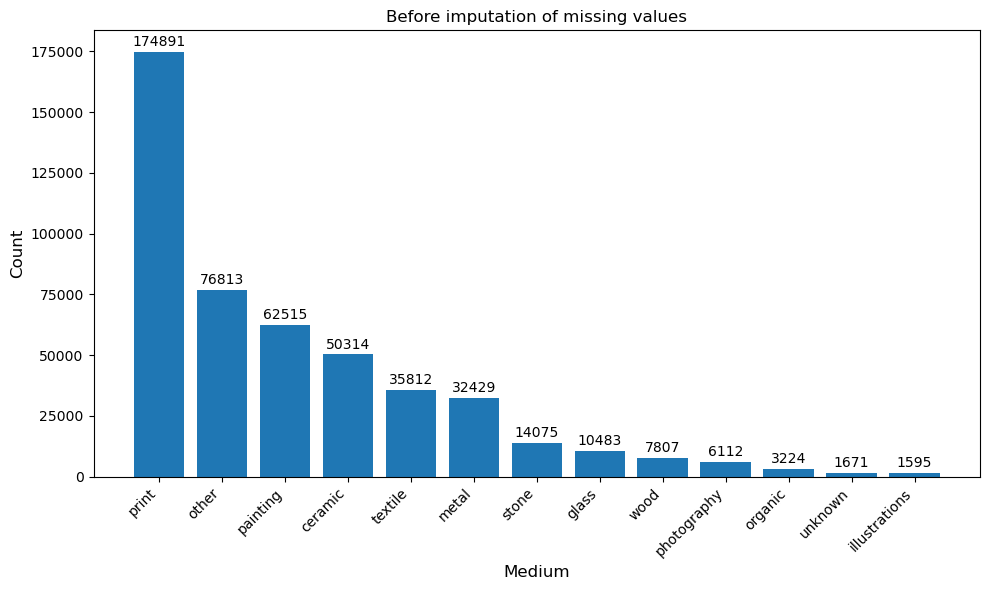

In [249]:
medium_counts = df['Medium'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(medium_counts.index.astype(str), medium_counts.values)
ax.set_title("Before imputation of missing values")
ax.set_xlabel('Medium', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.bar_label(bars, labels=[f"{v}" for v in medium_counts.values], padding=2)
plt.tight_layout()
plt.show()

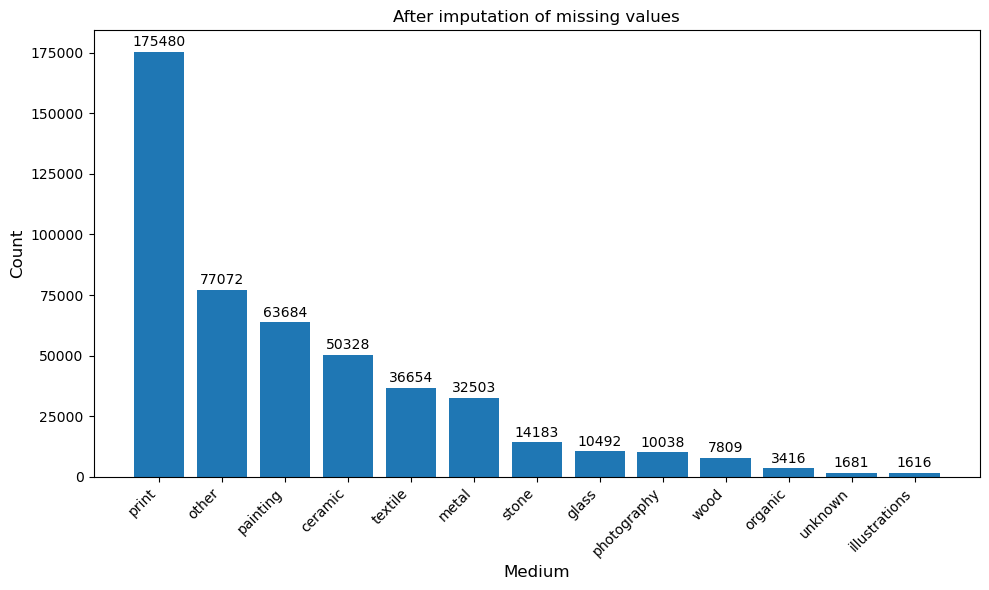

In [247]:
medium_counts = imp_df['Medium'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(medium_counts.index.astype(str), medium_counts.values)
ax.set_title("After imputation of missing values")
ax.set_xlabel('Medium', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.bar_label(bars, labels=[f"{v}" for v in medium_counts.values], padding=2)
plt.tight_layout()
plt.show()


## Dimension extraction

In [5]:
df['Dimensions'].value_counts().head(30)

Dimensions
sheet: 2 11/16 x 1 3/8 in. (6.9 x 3.5 cm)            2297
Sheet: 2 3/4 x 1 1/2 in. (7 x 3.8 cm)                2278
Sheet: 2 1/2 × 1 7/16 in. (6.4 × 3.7 cm)             2141
Sheet: 2 3/4 × 1 1/2 in. (7 × 3.8 cm)                1966
35mm                                                 1458
Sheet: 2 11/16 × 1 3/8 in. (6.8 × 3.5 cm)            1319
4 x 5 in.                                            1307
Sheet: 2 3/4 x 1 3/8 in. (7 x 3.5 cm)                1151
Approx. 3 1/2 × 7 in. (8.9 × 17.8 cm)                 989
Sheet: 2 5/8 × 1 1/2 in. (6.7 × 3.8 cm)               921
Sheet: 3 1/2 × 2 1/2 in. (8.9 × 6.4 cm)               887
Sheet: 3 1/2 × 2 1/2 in. (8.9 × 6.3 cm)               873
Sheet: 5 3/8 × 3 3/8 in. (13.6 × 8.5 cm)              782
Approx. 10.2 x 6.3 cm (4 x 2 1/2 in.)                 780
8 x 10 in.                                            767
7.9 x 7.9 cm (3 1/8 x 3 1/8 in.)                      734
2 1/2 x 4 1/4 in.                                     707
6 1

Let's convert values to lowercase, replace  ',' to '.', and convert the '×' symbol into the 'x'. Dimensions will be extracted using regular expressions.

In [7]:
df['Dimensions'] = (
    df['Dimensions']
    .str.strip()               
    .str.lower()
    .str.replace(',', '.', regex=False)
    .str.replace('×', 'x', regex=False)
    .astype(str)
)

Length will be taken as height.

In [11]:
import re

def extract_dimensions(string):
    #pattern for finding numbers
    pattern = r'(\d+(?:\.\d+)?)'
    h = w = d = None

    h_match = re.search(rf'(?:height|h\.|length)[:\s]*{pattern}\s*cm', string)
    if h_match:
        h = float(h_match.group(1))

    w_match = re.search(rf'(?:width|w\.)[:\s]*{pattern}\s*cm', string)
    if w_match:
        w = float(w_match.group(1))

    d_match = re.search(rf'(?:depth|d\.)[:\s]*{pattern}\s*cm', string)
    if d_match:
        d = float(d_match.group(1))

    # checking 1 x 1 x 1 format
    if not any([h, w, d]):
        match = re.search(rf'{pattern}\s*x\s*{pattern}(?:\s*x\s*{pattern})?\s*cm', string)
        if match:
            nums = [float(m) for m in match.groups() if m]
            if len(nums) == 3:
                h, w, d = nums
            elif len(nums) == 2:
                h, w = nums

    # if single value, we take it as height
    if not any([h, w, d]):
        h_match = re.search(rf'{pattern}\s*cm', string)
        if h_match:
            h = float(h_match.group(1))

    return pd.Series({'Height': h, 'Width': w, 'Depth': d})

In [13]:
dims = df['Dimensions'].apply(extract_dimensions)

In [17]:
df = pd.concat([df, dims], axis=1)

In [25]:
df[["Dimensions", "Height", "Width", "Depth"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dimensions  484956 non-null  object 
 1   Height      390166 non-null  float64
 2   Width       299140 non-null  float64
 3   Depth       37553 non-null   float64
dtypes: float64(3), object(1)
memory usage: 14.8+ MB


A total of 390 166 height values, 299 140 width values, and 37, 53 depth values were successfully extracted.